# A3a: Signals and Noise
Finn Hittson - fxh157  
CSDS 464  
Due: February 27th, 2023

## 1. Continuous signals and sampling

### 1a. Sampled functions

In [1]:
import A3a_fxh157 as a3a
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import IPython

import sys
sys.path.append('../464-A1b_fxh157_files/')
import A1b_fxh157 as a1b

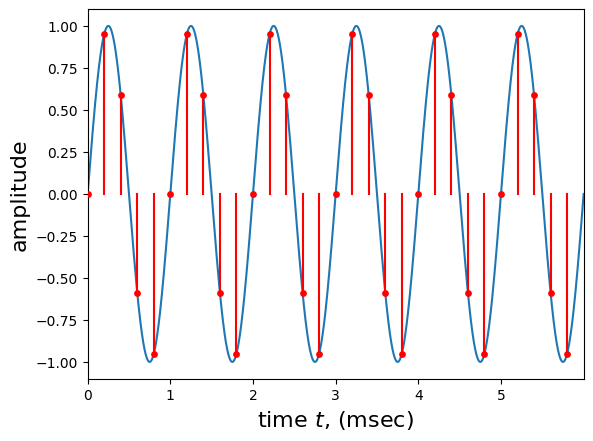

In [2]:
a3a.plot_sampled_function(g=a1b.sinewave, fs=5, tlim=(0, 6), tscale=1, tunits="msec", f=1)

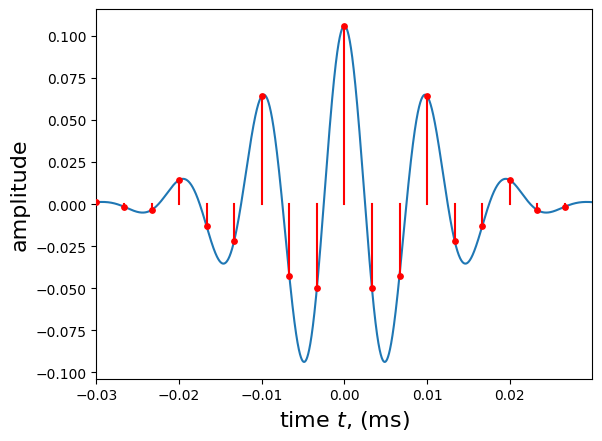

In [3]:
a3a.plot_sampled_function(g=a1b.gabore, fs=3, tlim=(-0.03, 0.03), tscale=0.01, tunits="ms", f=100, a=0.106, sigma=0.01)

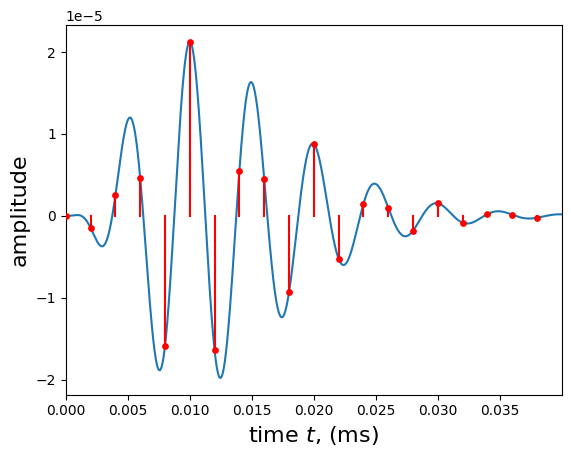

In [4]:
a3a.plot_sampled_function(g=a1b.gammatone, fs=5, tlim=(0,0.04), tscale=0.01, tunits="ms", f=200)

### 1b. The Nyquist frequency and aliasing

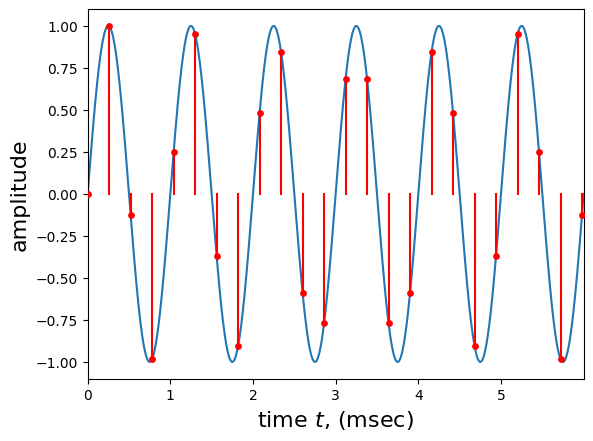

In [5]:
a3a.plot_sampled_function(g=a1b.sinewave, fs=5, tlim=(0, 6), tscale=1.3, tunits="msec", f=1)

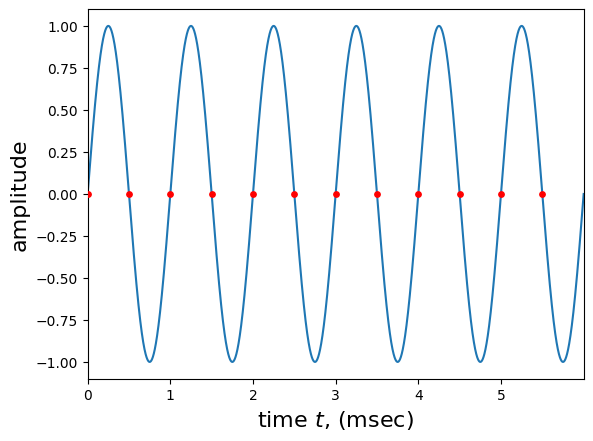

In [6]:
a3a.plot_sampled_function(g=a1b.sinewave, fs=2, tlim=(0, 6), tscale=1, tunits="msec", f=1)

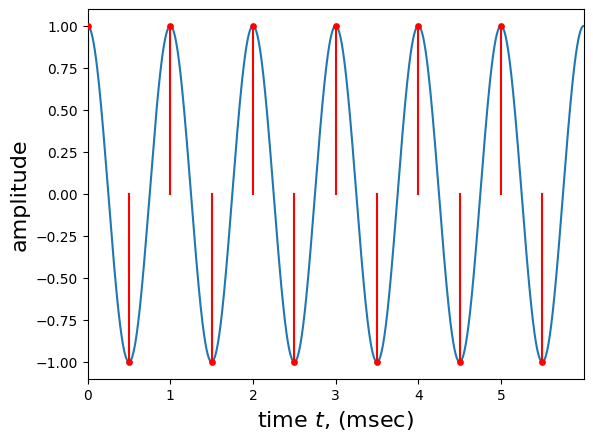

In [7]:
a3a.plot_sampled_function(g=a1b.sinewave, fs=2, tlim=(0, 6), tscale=1, tunits="msec", f=1, d=0.25)

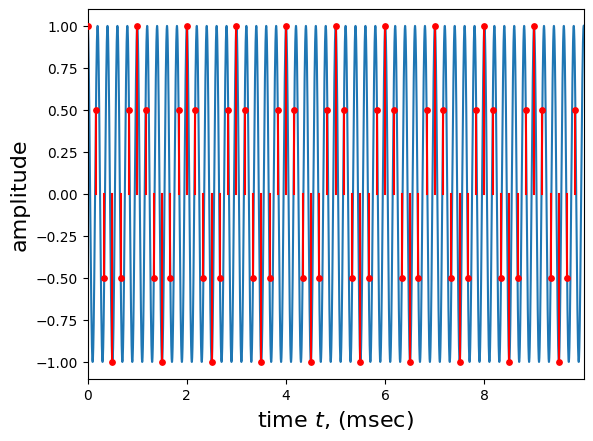

In [8]:
a3a.plot_sampled_function(g=a1b.sinewave, fs=6, tlim=(0, 10), tscale=1, tunits="msec", f=5, d=0.25/5)

## 2. Signals

### 2a. Delta and step functions

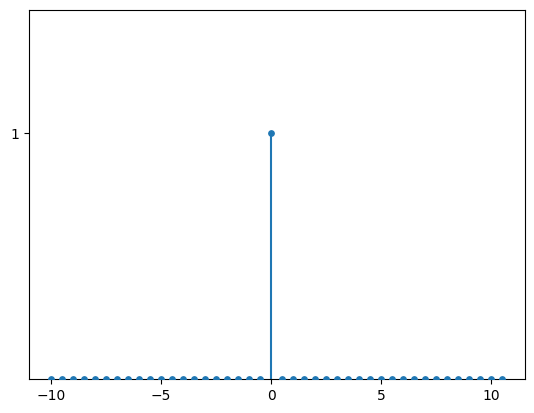

In [9]:
a3a.plot_delta_step(t=10, fs=2, g=a3a.d, plot_type="stem")

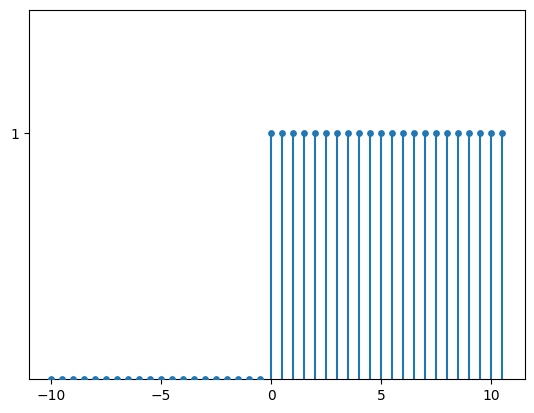

In [10]:
a3a.plot_delta_step(t=10, fs=2, g=a3a.u, plot_type="stem")

### 2b. `gensignal`

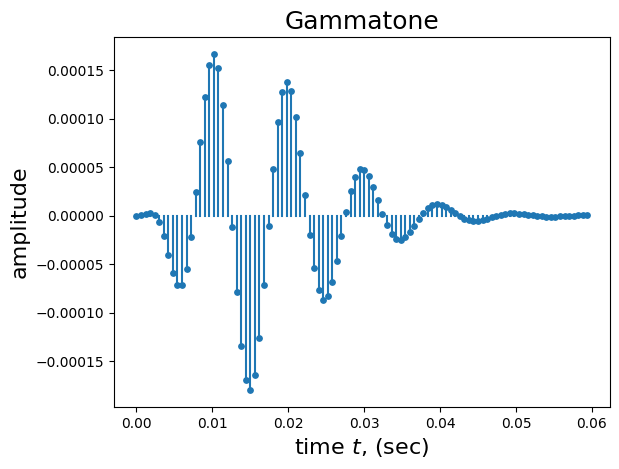

In [11]:
t, y = a3a.gensignal(t=0, g=a1b.gammatone, fs=100, tau=0, T=0.06, f=100)
a3a.plot_stem(t, y, title="Gammatone")

## 3. Noise and SNR

### 3a. `energy`, `power`, and `snr`

In [12]:
def energy(x):
    return np.linalg.norm(x)**2

def power(x):
    return np.linalg.norm(x)**2/len(x)

def snr(Ps, Pn):
    return Ps/Pn

### 3b. Noisy signals

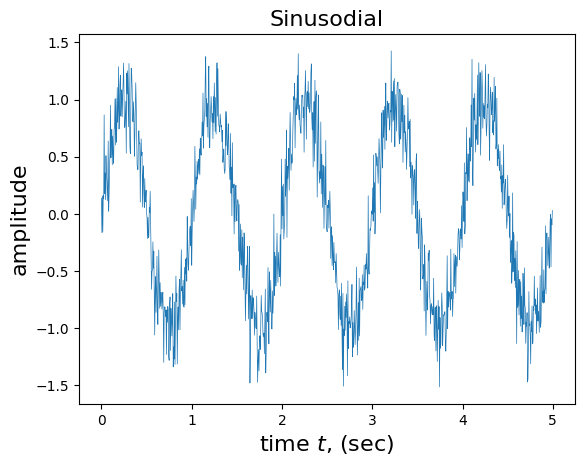

In [13]:
t, y, n = a3a.noisysignal(t=0, g=a1b.sinewave, fs=1000, tau=0, T=5, s=0.2)
a3a.plot_noisysignal(t, y+n, "Sinusodial")

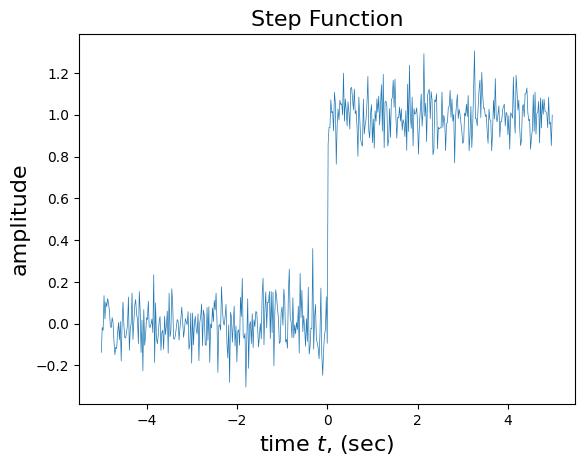

In [14]:
t, y, n = a3a.noisysignal(t=-5, g=a3a.u, fs=500, tau=0, T=5, s=0.1)
a3a.plot_noisysignal(t, y+n, "Step Function")

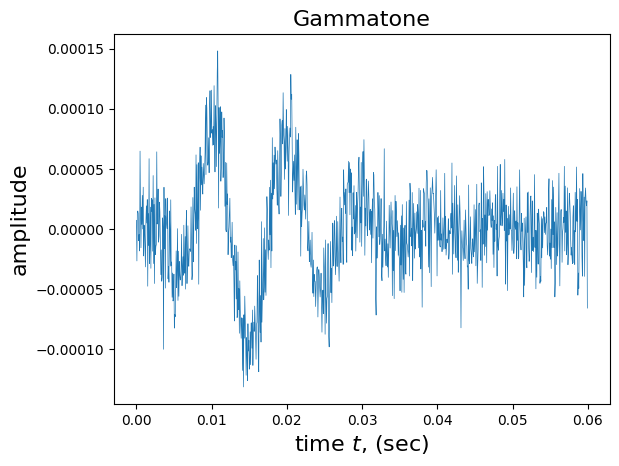

In [15]:
t, y, n = a3a.noisysignal(t=0, g=a1b.gammatone, fs=1000, tau=0, T=0.06, s=0.000025, f=100)
a3a.plot_noisysignal(t, y+n, title="Gammatone")

### 3c. Noise level specified by SNR

In [16]:
sigma = 0
for _ in range(100):
    t, _, n = a3a.noisysignal(t=0, g=a1b.sinewave, fs=1000, tau=0, T=5, s=0.2)
    _, x, _ = a3a.noisysignal(t=0, g=a1b.sinewave, fs=1000, tau=0, T=5, s=0)
    Ps = a3a.power(x)
    Pn = a3a.power(n)
    SNR = a3a.snr(Ps, Pn)
    sigma += a3a.snr2sigma(x, snr=SNR)
print(sigma/100)

0.16637099605607275


### 3d. Estimating SNR

signal start index: 500/2000
signal end index: 1500/2000
snr: 17.128dB

estimated start index: 517/2000
estimated end index: 1488/2000
estimated snr: 16.662dB


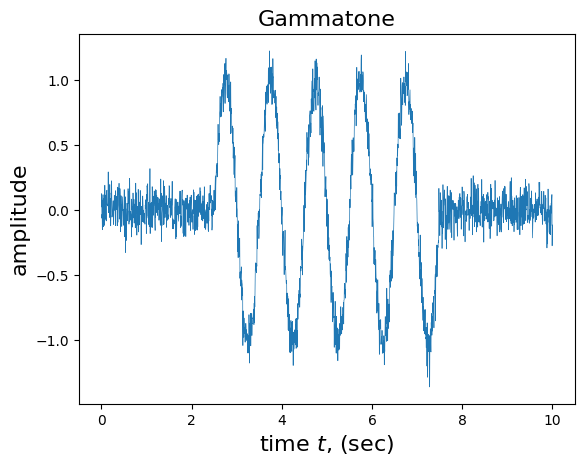

In [17]:
fs = 1000
tau = 0
T = 5
t0 = 0
size = 500
s = 0.1

_, y0, n0 = a3a.noisysignal(t=t0, g=a1b.sinewave, fs=fs, tau=tau, T=T, s=s)
t, y, n = a3a.extend(t=t0, y=y0, n=n0, fs=fs, T=T, size=size, s=s)
signal = y+n

Ps = a3a.power(y0)
Pn = a3a.power(n0)
print(f"signal start index: {size}/{len(y)}")
print(f"signal end index: {len(signal) - size}/{len(signal)}")
print(f"snr: {round(10*math.log10(a3a.snr(Ps, Pn)), 3)}dB\n")

th = max(signal)*(4*s)
start, stop = a3a.extent(y=signal, th=th)
Ps = a3a.power(signal[start:stop])
Pn = a3a.power(np.concatenate((signal[:start], signal[stop:])))
print(f"estimated start index: {start}/{len(signal)}")
print(f"estimated end index: {stop}/{len(signal)}")
print(f"estimated snr: {round(10*math.log10(a3a.snr(Ps, Pn)), 3)}dB")

a3a.plot_noisysignal(t, signal, title="Gammatone")

## 4. Grand synthesis

In [18]:
fs = 5000
f = 50
tau = 0
T = 0.04
t0 = 0
size = 40000
s = 0.000005

_, y0, n0 = a3a.noisysignal(t=t0, g=a1b.gammatone, fs=fs, tau=tau, T=T, s=s, f=f)
t, y, n = a3a.extend(t=t0, y=y0, n=n0, fs=fs, T=T, size=size, s=s)
signal = y+n
'''
Ps = a3a.power(y0)
Pn = a3a.power(n0)
print(f"signal start index: {size}/{len(y)}")
print(f"signal end index: {len(signal) - size}/{len(signal)}")
print(f"snr: {round(10*math.log10(a3a.snr(Ps, Pn)), 3)}dB\n")

th = max(signal)/3
start, stop = a3a.extent(y=signal, th=th)
Ps = a3a.power(signal[start:stop])
Pn = a3a.power(np.concatenate((signal[:start], signal[stop:])))
print(f"estimated start index: {start}/{len(signal)}")
print(f"estimated end index: {stop}/{len(signal)}")
print(f"estimated snr: {round(10*math.log10(a3a.snr(Ps, Pn)), 3)}dB")
'''
scipy.io.wavfile.write("sound.wav", rate=44100, data=signal.astype(np.float32)*10000)
IPython.display.Audio("sound.wav")
#a3a.plot_noisysignal(t, signal, title="Gammatone")